### how many dummy variables you have created and RMSE value for each model. Finally which model you will use for forecasting.

In [1]:
##importing the required libraries for Analysis

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df = pd.read_excel('Airlines+Data.xlsx',header=0,index_col='Month',parse_dates=True)

In [3]:
df.index.freq = 'MS'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [5]:
df.fillna(method='ffill')

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [6]:
df.dropna(inplace=True)

In [7]:
df.index.freq

<MonthBegin>

In [8]:
df.isnull().any()

Passengers    False
dtype: bool

In [9]:
df.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [10]:
df.shape

(96, 1)

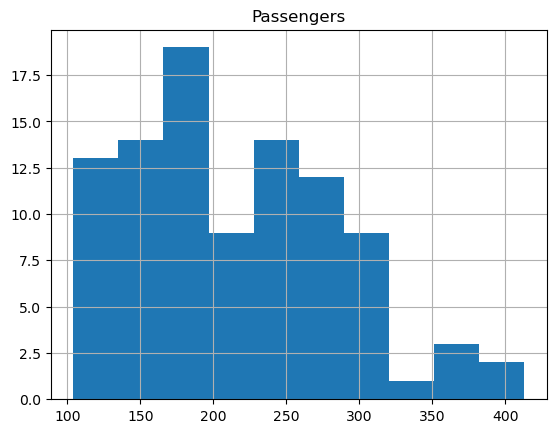

In [11]:
df.hist()
plt.show()

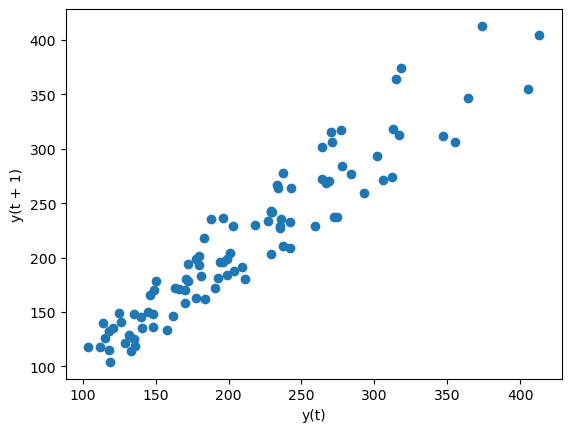

In [12]:
##Lag_plot
lag_plot(df)
plt.show()

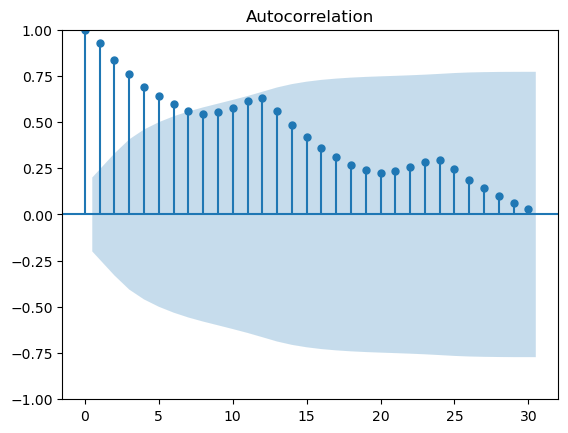

In [13]:
#Autocorrelation Plot
plot_acf(df,lags=30)
plt.show()

## Total month=96 (8 years)
### Train Data= 72 months (6 years)(75% of data)
### Test Data= 24 months (2years)(25% of data)

In [14]:
train_data = df.iloc[:72,:] 
test_data = df.iloc[72:,:]

In [15]:
train_data.shape, test_data.shape

((72, 1), (24, 1))

In [16]:
train_data.tail()

,Passengers
Month,
2000-08-01,293
2000-09-01,259
2000-10-01,229
2000-11-01,203
2000-12-01,229


In [17]:
test_data.head()

,Passengers
Month,
2001-01-01,242
2001-02-01,233
2001-03-01,267
2001-04-01,269
2001-05-01,270


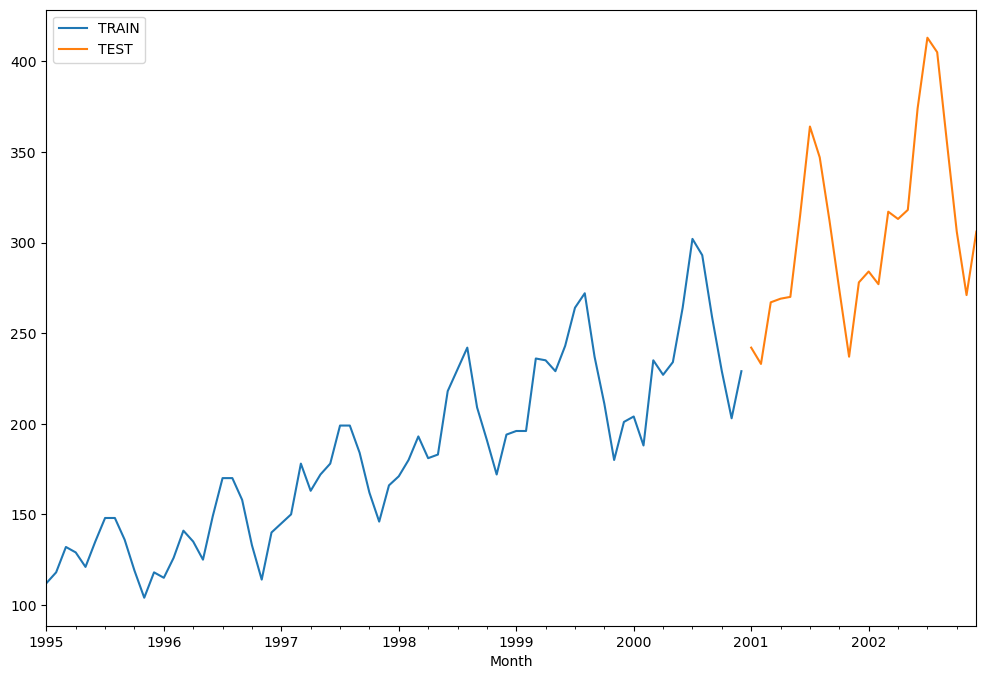

In [18]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

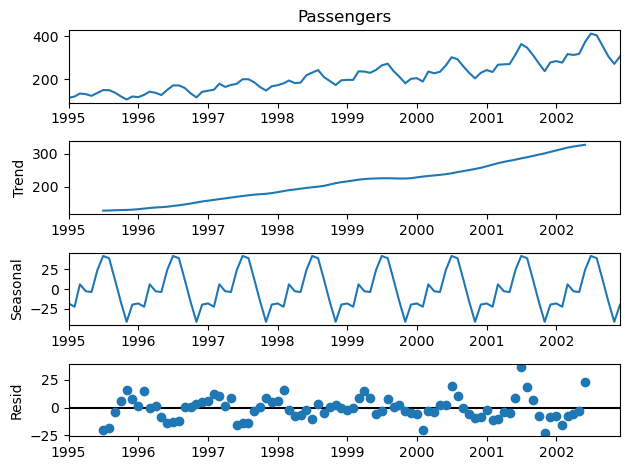

In [19]:
result = seasonal_decompose(df['Passengers'])  
result.plot();

### First Look: The Trend is upward and the Sessionality is multiplicative

# SimpleExpSmoothing

In [20]:
alpha = 0.15

In [21]:
model_ses12=SimpleExpSmoothing(train_data['Passengers'])
fitted_model= model_ses12.fit(smoothing_level=alpha,optimized=False)
fitted_model.fittedvalues

Month
1995-01-01    112.000000
1995-02-01    112.000000
1995-03-01    112.900000
1995-04-01    115.765000
1995-05-01    117.750250
                 ...    
2000-08-01    237.405685
2000-09-01    245.744832
2000-10-01    247.733107
2000-11-01    244.923141
2000-12-01    238.634670
Freq: MS, Length: 72, dtype: float64

In [22]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Passengers,SES12
Month,,
1995-01-01,112,112.000000
1995-02-01,118,112.900000
1995-03-01,132,115.765000
1995-04-01,129,117.750250
1995-05-01,121,118.237712


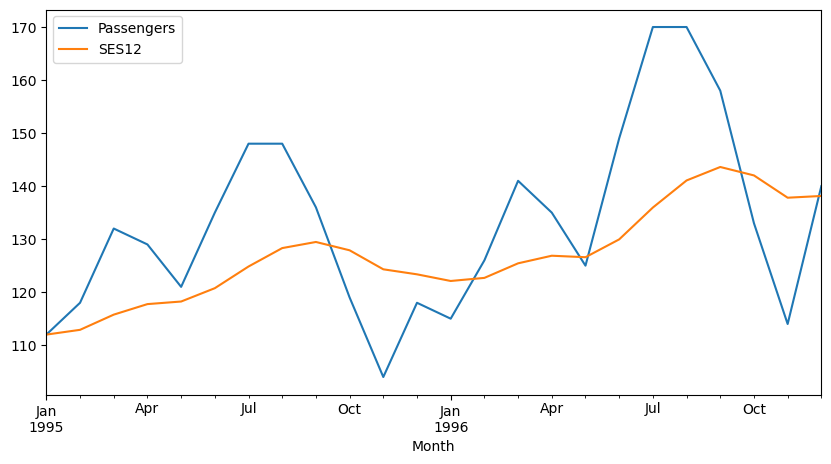

In [23]:
df[['Passengers','SES12']].iloc[:24].plot(figsize=(10,5));

In [24]:
test_predictions =fitted_model.forecast(24)

In [25]:
test_predictions

2001-01-01    237.189469
2001-02-01    237.189469
2001-03-01    237.189469
2001-04-01    237.189469
2001-05-01    237.189469
2001-06-01    237.189469
2001-07-01    237.189469
2001-08-01    237.189469
2001-09-01    237.189469
2001-10-01    237.189469
2001-11-01    237.189469
2001-12-01    237.189469
2002-01-01    237.189469
2002-02-01    237.189469
2002-03-01    237.189469
2002-04-01    237.189469
2002-05-01    237.189469
2002-06-01    237.189469
2002-07-01    237.189469
2002-08-01    237.189469
2002-09-01    237.189469
2002-10-01    237.189469
2002-11-01    237.189469
2002-12-01    237.189469
Freq: MS, dtype: float64

In [26]:
mean_squared_error(test_data,test_predictions)

7105.466752427145

In [27]:
rmse_simple= np.sqrt (mean_squared_error(test_data,test_predictions))
rmse_simple

84.2939306974538

> Simple exponential would not be suitalbe 

# Double Exponential Smoothing (trend-add)

In [28]:
mod_add12 = ExponentialSmoothing(train_data['Passengers'], trend='add')
fitted_model= mod_add12.fit()
df['DESadd12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Passengers,SES12,DESadd12
Month,,,
1995-01-01,112,112.000000,113.635509
1995-02-01,118,112.900000,119.635515
1995-03-01,132,115.765000,133.635534
1995-04-01,129,117.750250,130.635537
1995-05-01,121,118.237712,122.635521


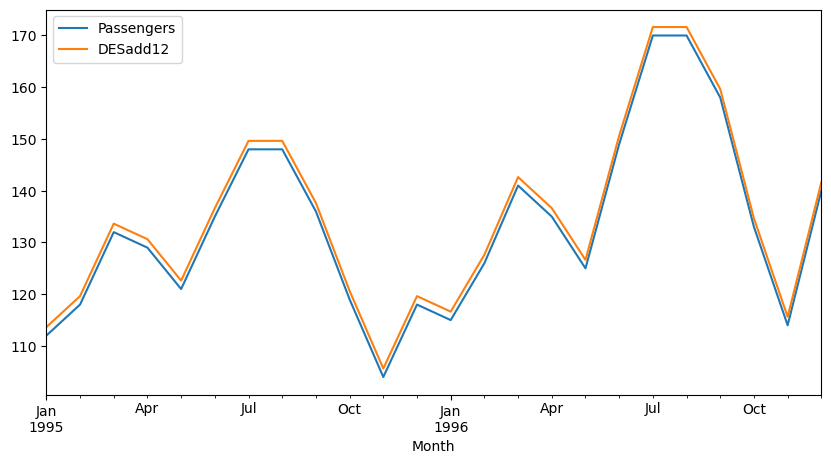

In [29]:
df[['Passengers','DESadd12']].iloc[:24].plot(figsize=(10,5));

In [30]:
test_predictions =fitted_model.forecast(24)

In [31]:
test_predictions.head()

2001-01-01    230.635494
2001-02-01    232.271005
2001-03-01    233.906516
2001-04-01    235.542027
2001-05-01    237.177538
Freq: MS, dtype: float64

In [32]:
mean_squared_error(test_data,test_predictions)

5151.2239854867885

In [33]:
rmse_DEadd= np.sqrt (mean_squared_error(test_data,test_predictions))
rmse_DEadd

71.77202787637248

## Double Exponential Smoothing (trend-add)

In [34]:
mod_mul12 = ExponentialSmoothing(train_data['Passengers'], trend='mul')
fitted_model= mod_mul12.fit()
df['DESmul12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Passengers,SES12,DESadd12,DESmul12
Month,,,,
1995-01-01,112,112.000000,113.635509,112.310880
1995-02-01,118,112.900000,119.635515,118.327559
1995-03-01,132,115.765000,133.635534,132.366493
1995-04-01,129,117.750250,130.635537,129.358169
1995-05-01,121,118.237712,122.635521,121.335922


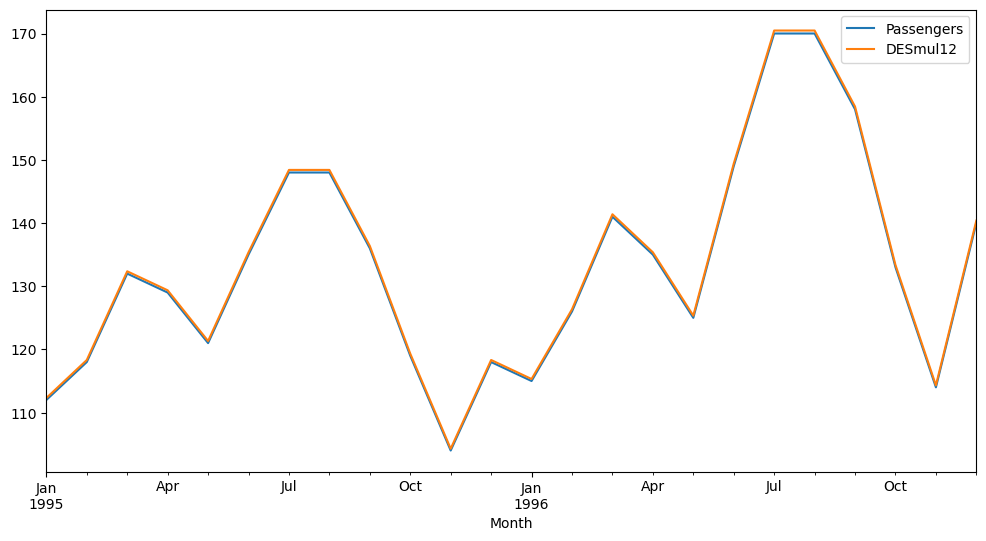

In [35]:
df[['Passengers','DESmul12']].iloc[:24].plot(figsize=(12,6));

In [36]:
test_predictions =fitted_model.forecast(24)

In [37]:
test_predictions.head()

2001-01-01    229.636702
2001-02-01    230.275209
2001-03-01    230.915492
2001-04-01    231.557555
2001-05-01    232.201403
Freq: MS, dtype: float64

In [38]:
mean_squared_error(test_data,test_predictions)

6916.395302226391

In [39]:
rmse_DEmul= np.sqrt (mean_squared_error(test_data,test_predictions))
rmse_DEmul

83.16486819701208

## Triple Exponential Smoothing

In [40]:
tes_add12 = ExponentialSmoothing(train_data['Passengers'], trend='add',seasonal='add',seasonal_periods=12)
fitted_model= tes_add12.fit()
df['TESadd12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Passengers,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,
1995-01-01,112,112.000000,113.635509,112.310880,114.543772
1995-02-01,118,112.900000,119.635515,118.327559,143.575822
1995-03-01,132,115.765000,133.635534,132.366493,126.478710
1995-04-01,129,117.750250,130.635537,129.358169,127.568774
1995-05-01,121,118.237712,122.635521,121.335922,142.622664


<AxesSubplot:xlabel='Month'>

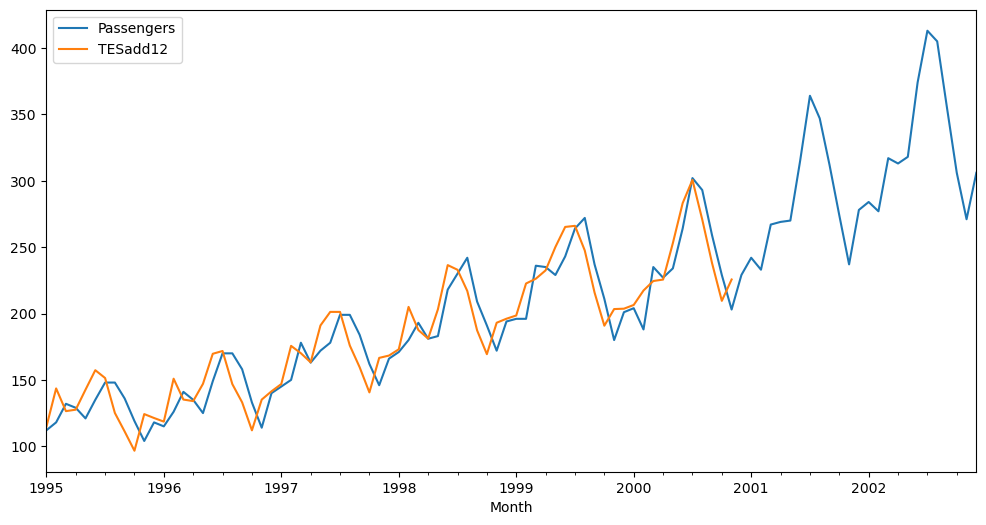

In [41]:
df[['Passengers','TESadd12']].plot(figsize=(12,6))

In [42]:
test_predictions =fitted_model.forecast(24)

In [43]:
test_predictions.head()

2001-01-01    230.654550
2001-02-01    233.154216
2001-03-01    259.320869
2001-04-01    251.820731
2001-05-01    250.820511
Freq: MS, dtype: float64

In [44]:
mean_squared_error(test_data,test_predictions)

2262.9305120899276

In [45]:
rmse_TESadd12= np.sqrt (mean_squared_error(test_data,test_predictions))
rmse_TESadd12

47.570269203462864

## Triple Exponential Smoothing with multiplicative seasonality and multiplicative trend

In [46]:
tes_mul12 = ExponentialSmoothing(train_data['Passengers'], trend='mul',seasonal='mul',seasonal_periods=12)
fitted_model= tes_mul12.fit()
df['TESmull12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Passengers,SES12,DESadd12,DESmul12,TESadd12,TESmull12
Month,,,,,,
1995-01-01,112,112.000000,113.635509,112.310880,114.543772,113.143962
1995-02-01,118,112.900000,119.635515,118.327559,143.575822,135.925887
1995-03-01,132,115.765000,133.635534,132.366493,126.478710,128.439649
1995-04-01,129,117.750250,130.635537,129.358169,127.568774,128.606820
1995-05-01,121,118.237712,122.635521,121.335922,142.622664,137.806219


<AxesSubplot:xlabel='Month'>

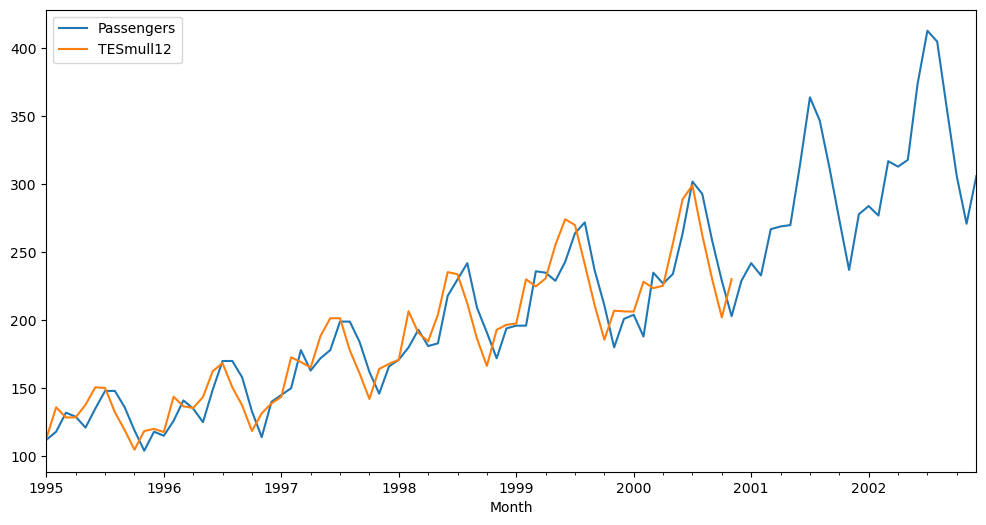

In [47]:
df[['Passengers','TESmull12']].plot(figsize=(12,6))

In [48]:
test_predictions =fitted_model.forecast(24)

In [49]:
test_predictions.head()

2001-01-01    233.064574
2001-02-01    234.636501
2001-03-01    274.649481
2001-04-01    264.204558
2001-05-01    263.842236
Freq: MS, dtype: float64

In [50]:
mean_squared_error(test_data,test_predictions)

531.7102010624327

In [51]:
rmse_TESmul12= np.sqrt (mean_squared_error(test_data,test_predictions))
rmse_TESmul12 

23.058842144878668

## Triple exponential smoothing with multiplicative seasonality and additive trend

In [52]:
tes_add_mul12 = ExponentialSmoothing(train_data['Passengers'], trend='add',seasonal='mul',seasonal_periods=12)
fitted_model= tes_add_mul12.fit()
df['TESadd_mull12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Passengers,SES12,DESadd12,DESmul12,TESadd12,TESmull12,TESadd_mull12
Month,,,,,,,
1995-01-01,112,112.000000,113.635509,112.310880,114.543772,113.143962,113.522357
1995-02-01,118,112.900000,119.635515,118.327559,143.575822,135.925887,136.673394
1995-03-01,132,115.765000,133.635534,132.366493,126.478710,128.439649,129.206468
1995-04-01,129,117.750250,130.635537,129.358169,127.568774,128.606820,129.429231
1995-05-01,121,118.237712,122.635521,121.335922,142.622664,137.806219,138.725146


In [53]:
test_predictions =fitted_model.forecast(24)

In [54]:
test_predictions.head()

2001-01-01    232.087343
2001-02-01    232.964632
2001-03-01    271.830176
2001-04-01    260.714040
2001-05-01    259.598886
Freq: MS, dtype: float64

In [55]:
mean_squared_error(test_data,test_predictions)

1224.2688841324352

In [56]:
rmse_TES_add_mul12= np.sqrt (mean_squared_error(test_data,test_predictions))
rmse_TES_add_mul12 

34.98955392874329

<AxesSubplot:xlabel='Month'>

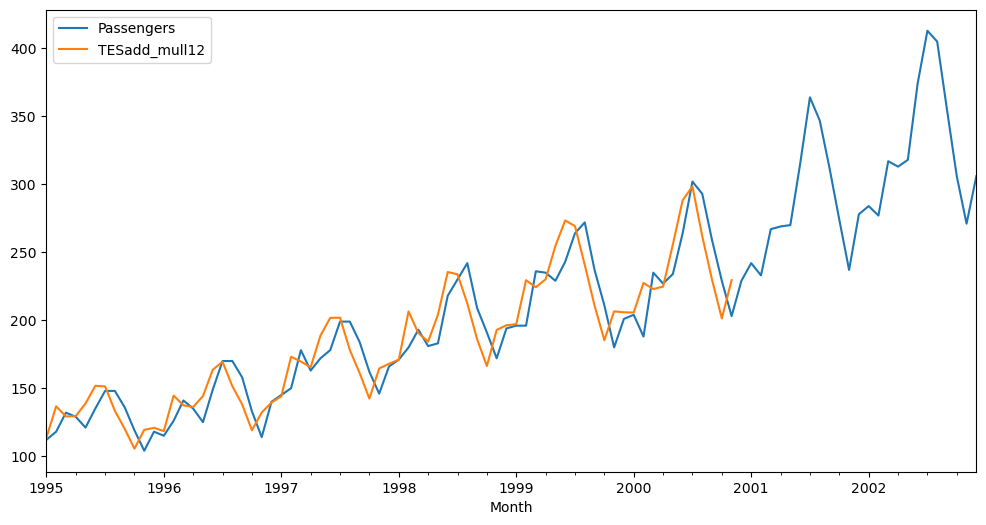

In [57]:
df[['Passengers','TESadd_mull12']].plot(figsize=(12,6))

<AxesSubplot:xlabel='Month'>

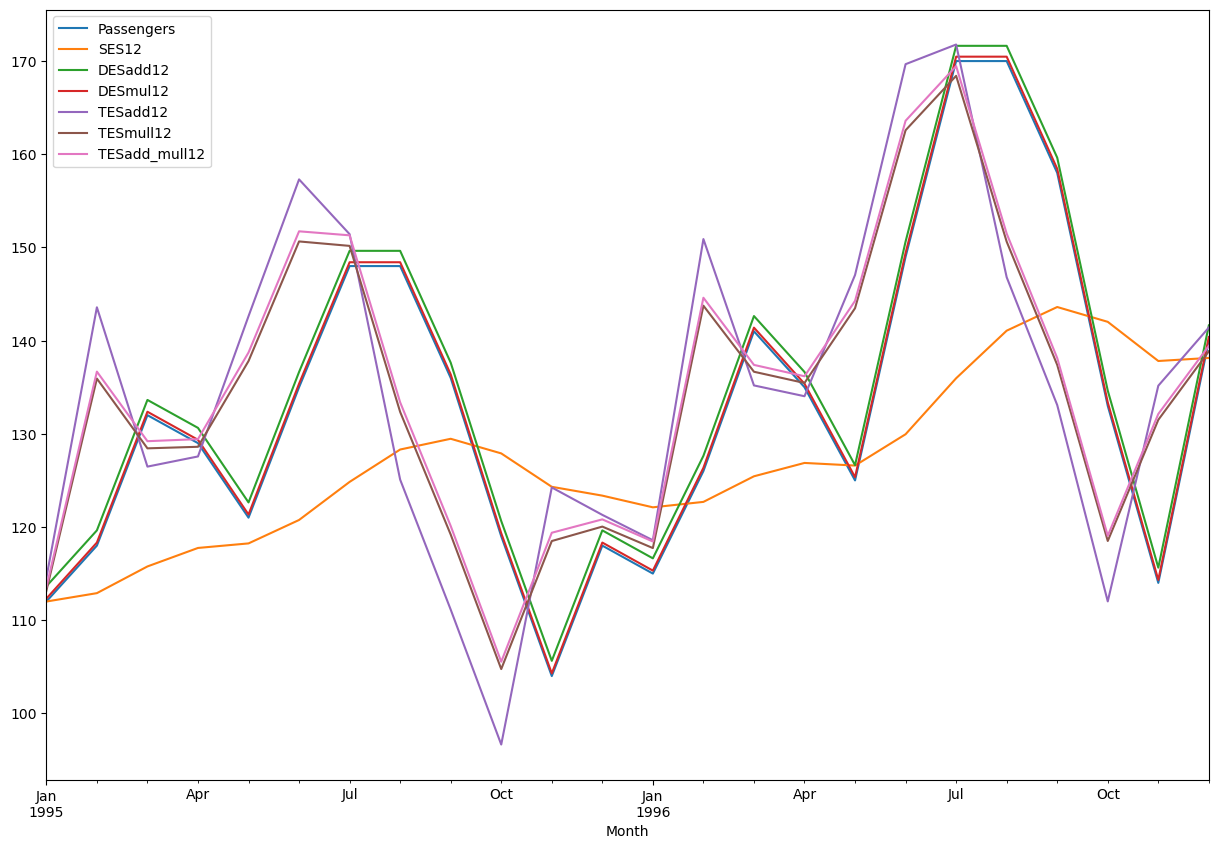

In [58]:
## All together
df[['Passengers',"SES12",'DESadd12','DESmul12','TESadd12','TESmull12','TESadd_mull12']].iloc[:24].plot(figsize=(15,10))


In [59]:
rmse_TES_add_mul12,rmse_TESmul12, rmse_TESadd12, rmse_DEmul, rmse_DEadd, rmse_simple

(34.98955392874329,
 23.058842144878668,
 47.570269203462864,
 83.16486819701208,
 71.77202787637248,
 84.2939306974538)

In [60]:
rmse_TESmul12

23.058842144878668

<AxesSubplot:xlabel='Month'>

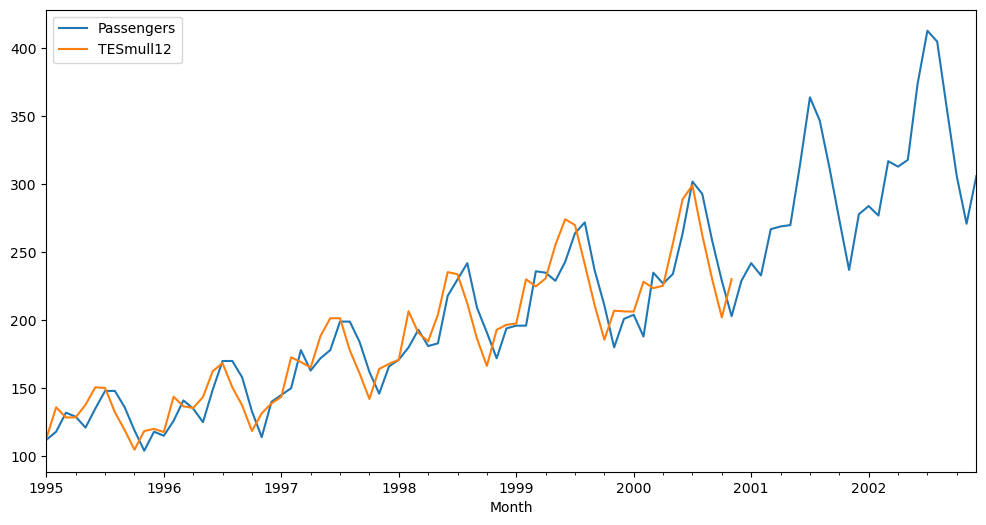

In [61]:
df[['Passengers','TESmull12']].plot(figsize=(12,6))

> Triple exponential smoothing with multiplicative seasonality and multiplicative trend would be best as rmse is low

## Forecasting into Future

In [62]:
final_model = ExponentialSmoothing(df['Passengers'], trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [63]:
forecast_predictions= final_model.forecast(24)
forecast_predictions

2003-01-01    315.018040
2003-02-01    311.707572
2003-03-01    361.239563
2003-04-01    352.908804
2003-05-01    354.363161
2003-06-01    403.880112
2003-07-01    450.857455
2003-08-01    445.618955
2003-09-01    395.599462
2003-10-01    347.197575
2003-11-01    304.934778
2003-12-01    348.175180
2004-01-01    357.239243
2004-02-01    353.485081
2004-03-01    409.655740
2004-04-01    400.208427
2004-05-01    401.857708
2004-06-01    458.011313
2004-07-01    511.284930
2004-08-01    505.344324
2004-09-01    448.620824
2004-10-01    393.731735
2004-11-01    345.804543
2004-12-01    394.840366
Freq: MS, dtype: float64

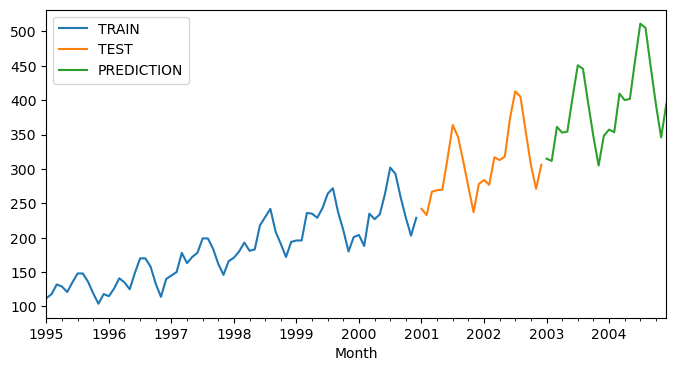

In [64]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(8,4))
forecast_predictions.plot(legend=True,label='PREDICTION');

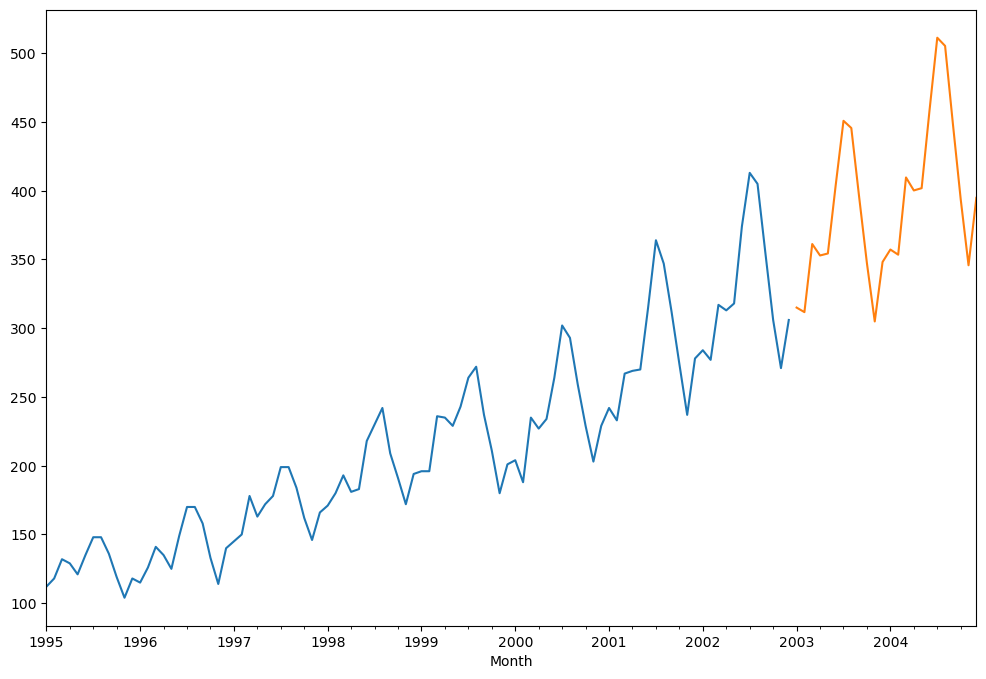

In [65]:
df['Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();